#### This notebook we will work in Logistic Regression



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import GridSearchCV

%matplotlib inline
SEED = 42

In [ ]:
# Read processe file
df = pd.read_csv('../data/processed_balanced_transaction.csv')
df.head()

#### Lets separate Level and features, Scaled features



In [4]:
X, y = df.drop(['isFraud'],axis=1), df['isFraud']
# scale the features by standard scaler
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872136 entries, 0 to 872135
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   accountNumber                  872136 non-null  int64  
 1   acqCountry                     872136 non-null  int64  
 2   availableMoney                 872136 non-null  float64
 3   cardCVV                        872136 non-null  int64  
 4   cardLast4Digits                872136 non-null  int64  
 5   cardPresent                    872136 non-null  int64  
 6   creditLimit                    872136 non-null  float64
 7   currentBalance                 872136 non-null  float64
 8   customerId                     872136 non-null  int64  
 9   enteredCVV                     872136 non-null  int64  
 10  expirationDateKeyInMatch       872136 non-null  int64  
 11  isFraud                        872136 non-null  int64  
 12  merchantCategoryCode          

#### Split data into train test 
 We are spliting data into train and test with ratio 30%. Means 30% test and 70% train data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=SEED)

#### Create a logistic regression classifier and fit the model and report accuracy

In [7]:
from sklearn import metrics
target_names = ['Not Fraud', 'Fraud']
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(metrics.classification_report(y_test, y_pred, digits=3, target_names=target_names))

              precision    recall  f1-score   support

   Not Fraud      0.623     0.713     0.665    130734
       Fraud      0.665     0.569     0.614    130907

    accuracy                          0.641    261641
   macro avg      0.644     0.641     0.639    261641
weighted avg      0.644     0.641     0.639    261641



#### Cross validation



To eliminate over-fitting, we can apply cross-validation. we are going to apply k-fold cross-validation.

it will split the original data set into k subsets and use one of the subsets as the testing set and the remaining as the training sets. This process iterated k times until every subset have been used as the testing set. Since 10-fold cross-validation is the most popular one, we are going to use that one.

Average score: 0.641


Text(0.5, 1.0, 'Average score: 0.6408193366617911')

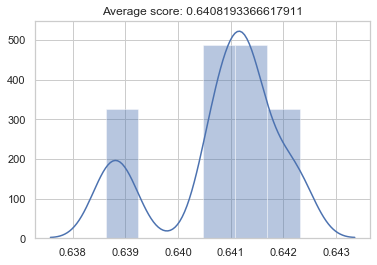

In [8]:
cv_scores = cross_val_score(lr, X_train, y_train, cv=10)
print('Average score: {}'.format(round(np.mean(cv_scores),3)))
sns.distplot(cv_scores)
plt.title('Average score: {}'.format(np.mean(cv_scores)))